In [18]:
!pip install control

In [19]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### **Nyquist Criterion**
$$Z = P + N$$


---
$Z$: Stable if $Z = 0$ \\
$P$: # of right half plane poles \\
$N$: # of circulations around $(-1, 0)$ \\
$\;\;\;$(CW: $+$, CCW: $-$)

---
$$G(s) = \frac{K(s^2 + 10s + 24)}{s^2 - 8s + 15}$$

**Right half plane poles:**

In [ ]:
s=ctl.tf('s')
G = (s**2 + 10*s + 24) / (s**2 - 8*s + 15)
poles = ctl.poles(G)
poles

array([5.+0.j, 3.+0.j])

In [ ]:
P = len(poles)
P

2

In [ ]:
N = 0 - P
N

-2

**For** $K=1$,

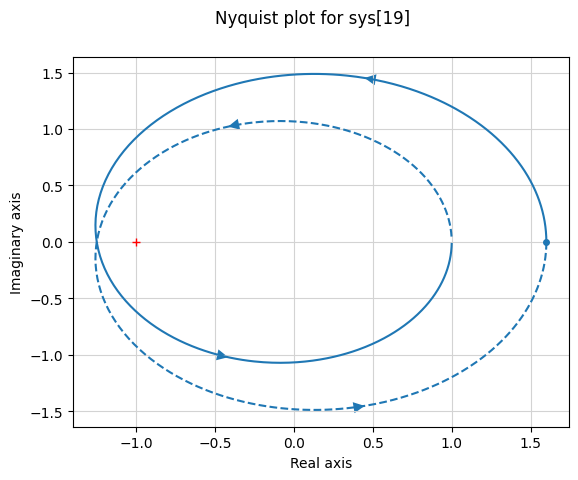

In [ ]:
K = 1
result = ctl.nyquist(K*G)

$N = -2$ and **2** CCW circulations around $(-1,0)$ $\rightarrow$ **Stable**

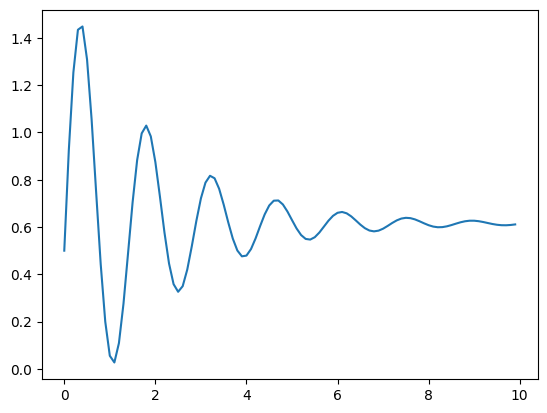

In [ ]:
t,y = ctl.step_response(ctl.feedback(K*G,1), np.arange(0,10, 0.1))
f1 = plt.plot(t,y)

**For** $K = 0.5$,

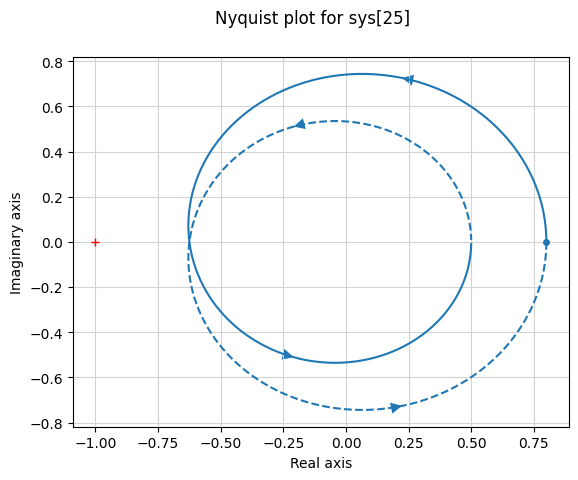

In [ ]:
K = 0.5
result = ctl.nyquist(K*G)

$N = -2$ and **0** CCW circulations around $(-1,0)$ $\rightarrow$ **Unstable**

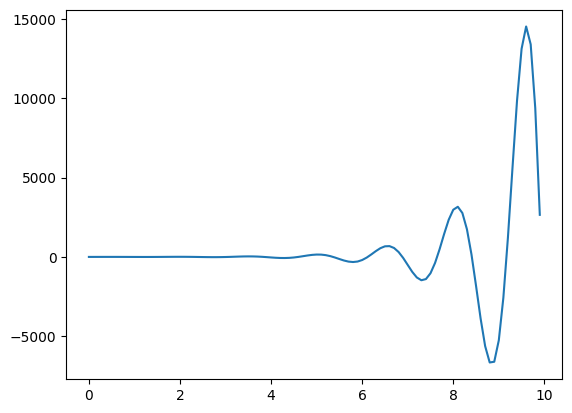

In [ ]:
t,y = ctl.step_response(ctl.feedback(K*G,1), np.arange(0,10, 0.1))
f2 = plt.plot(t,y)

### **Gain and phase margin**
$$G(s) = K\frac{50}{s^3 + 9s^2 + 30s + 40}$$

For K=1, GM = 4.60 dB (at 5.48 rad/s) and PM = 100.66 dB (at 1.85 rad/s)
For K=5, GM = 0.92 dB (at 5.48 rad/s) and PM = -2.85 dB (at 5.67 rad/s)


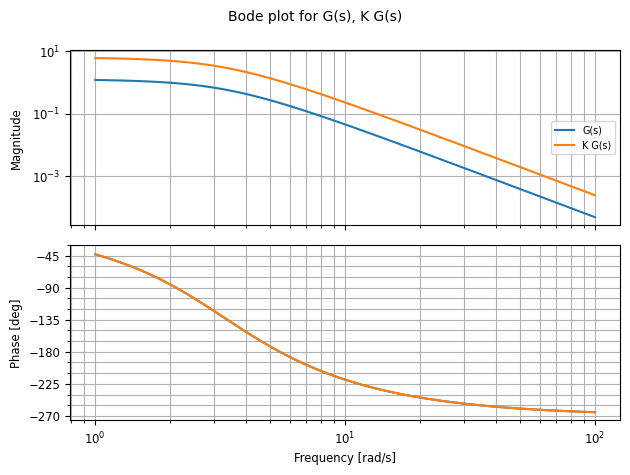

In [20]:
s = ctl.tf('s')
G = 50/(s**3 + 9*s**2 + 30*s + 40)
G.name='G(s)'
K = 5.0
KG = K*G
KG.name = 'K G(s)'
out = ctl.bode([G, KG])
gm_1, pm_1, Wcg_1, Wcp_1 = ctl.margin(G)
gm_2, pm_2, Wcg_2, Wcp_2 = ctl.margin(KG)
print('For K=1, GM = %.2f dB (at %.2f rad/s) and PM = %.2f dB (at %.2f rad/s)' % (gm_1, Wcg_1, pm_1, Wcp_1))
print('For K=5, GM = %.2f dB (at %.2f rad/s) and PM = %.2f dB (at %.2f rad/s)' % (gm_2, Wcg_2, pm_2, Wcp_2))

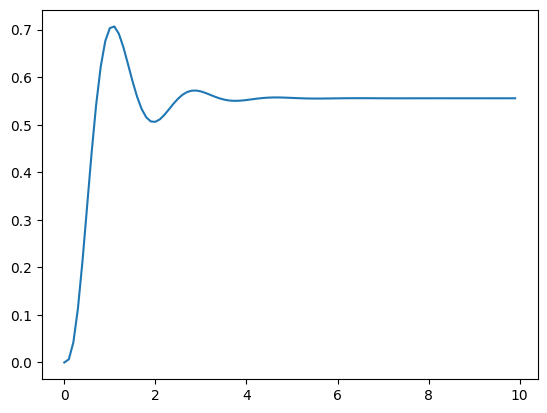

In [ ]:
t,y = ctl.step_response(ctl.feedback(G,1), np.arange(0,10, 0.1))
f3 = plt.plot(t,y)

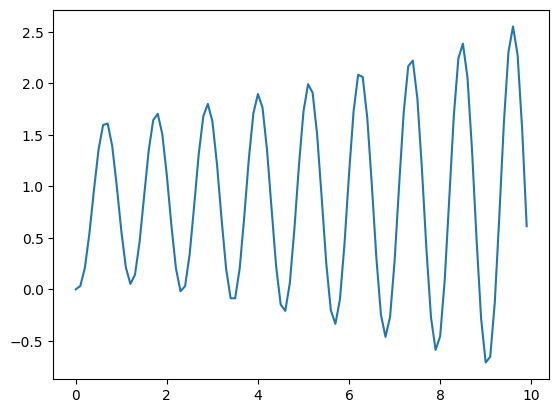

In [ ]:
t,y = ctl.step_response(ctl.feedback(KG,1), np.arange(0,10, 0.1))
f4 = plt.plot(t,y)